In [1]:
import numpy as np
import graphtools
from sklearn.neighbors import NearestNeighbors
from sklearn.base import BaseEstimator, TransformerMixin
import scprep, scipy as sp, phate


In [2]:
tree, branches = phate.tree.gen_dla(
    n_dim = 200, n_branch = 10, branch_length = 300, rand_multiplier = 2, seed=37, sigma = 5
)
data = tree
clusters = branches

In [3]:
phate_op = phate.PHATE()
data_ph = phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 3000 observations and 200 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.83 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.15 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.13 seconds.
  Calculated landmark operator in 3.15 seconds.
  Calculating optimal t...
    Automatically selected t = 54
  Calculated optimal t in 2.64 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.95 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.00 seconds.
Calculated PHATE in 11.68 seconds.


In [4]:
from degex.branches import BranchPointPredictor

In [5]:
bpp = BranchPointPredictor(phate_op)

/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BranchPointPredictor(phate_op=PHATE())

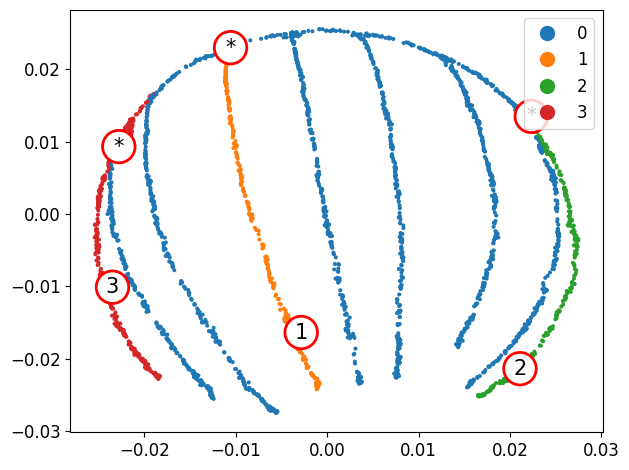

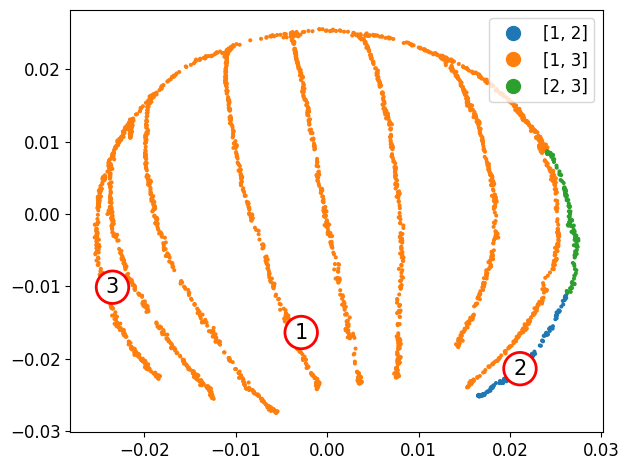

In [6]:
bpp.fit(data_ph)

In [7]:
from degex.branches import hacky_branch_point_prediction

/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


array([ 199,  204,  662,  664,  666,  672,  678,  781,  843,  846, 1044,
       1065, 1663, 1754, 2090, 2303, 2315, 2484, 2515, 2521, 2525, 2541,
       2581, 2633, 2729, 2737, 2760, 2770, 2776, 2802])

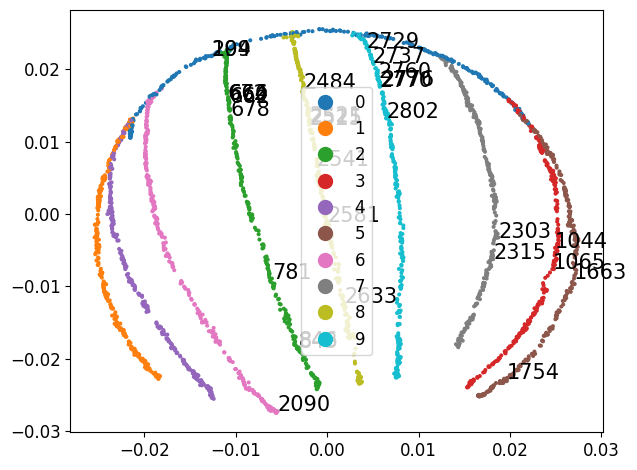

In [9]:
hacky_branch_point_prediction(
    data_ph,
    nearest_n=200,
    farest_n=5,    
    percentile=99,
    nearby_filter=None,
    clusters=branches,
    toggle=True
)